In [2]:
import os
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth  
from sklearn.datasets.samples_generator import make_blobs  
from sklearn import preprocessing 
import csv 
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
% matplotlib inline

In [3]:
alter = pd.read_excel('C:/Users/Yee Shen/Desktop/source/altersinfo_merge.xlsx',encoding='utf8')
alter.head()

,Unnamed: 0,Unnamed: 0.1,content,length,name,follow,fans,weibo
0,0,0,"[0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 1...",69,Dipsy迪西,309,6230000,5117
1,1,1,"[0, 1, 2, 3, 4, 8, 9, 11, 13, 14, 15, 16, 17, ...",63,新浪娱乐,3339,24370000,130000
2,2,2,"[0, 3, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19...",54,人民日报,3034,77810000,90000
3,3,3,"[0, 1, 2, 8, 9, 12, 13, 14, 15, 17, 19, 28, 29...",52,央视新闻,2624,74030000,100000
4,4,4,"[0, 4, 6, 9, 12, 13, 16, 17, 21, 22, 23, 25, 2...",51,思想聚焦,1725,26380000,80000


In [4]:
alter.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'content', 'length', 'name', 'follow',
       'fans', 'weibo'],
      dtype='object')

In [11]:
a = alter[[ 'length',  'fans']]
a

,length,fans
0,69,6230000
1,63,24370000
2,54,77810000
3,52,74030000
4,51,26380000
5,49,28380000
6,45,20320000
7,44,3190000
8,41,9250000
9,39,12740000


In [12]:
X = np.array(a.astype(float))
#X = np.transpose(X)
X = preprocessing.scale(X) 
X

array([[40.30652801,  1.76057339],
       [36.73123463,  7.25914622],
       [31.36829457, 23.45780839],
       ...,
       [-0.21346356,  0.41472646],
       [-0.21346356, -0.12482479],
       [-0.21346356, -0.12778959]])

In [13]:
ms = MeanShift()  
ms.fit(X)  
labels = ms.labels_  
cluster_centers = ms.cluster_centers_  
  
labels_unique = np.unique(labels)  
n_clusters_ = len(labels_unique)  
  
print( "number of estimated clusters: %d" % n_clusters_ )

number of estimated clusters: 303


In [22]:
alter['group'] = np.nan  
for i in range(len(X)):  
    alter['group'].iloc[i] = labels[i]  

D:\Professional software\Anaconda3\lib\site-packages\pandas\core\indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
alter

,Unnamed: 0,Unnamed: 0.1,content,length,name,follow,fans,weibo
0,0,0,"[0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 1...",69,Dipsy迪西,309,6230000,5117
1,1,1,"[0, 1, 2, 3, 4, 8, 9, 11, 13, 14, 15, 16, 17, ...",63,新浪娱乐,3339,24370000,130000
2,2,2,"[0, 3, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19...",54,人民日报,3034,77810000,90000
3,3,3,"[0, 1, 2, 8, 9, 12, 13, 14, 15, 17, 19, 28, 29...",52,央视新闻,2624,74030000,100000
4,4,4,"[0, 4, 6, 9, 12, 13, 16, 17, 21, 22, 23, 25, 2...",51,思想聚焦,1725,26380000,80000
5,5,5,"[2, 6, 8, 9, 11, 12, 16, 17, 21, 30, 31, 33, 3...",49,当时我就震惊了,879,28380000,80000
6,6,6,"[0, 1, 4, 8, 12, 16, 17, 19, 21, 25, 30, 33, 4...",45,冷笑话精选,1154,20320000,100000
7,7,7,"[0, 2, 3, 4, 6, 11, 13, 15, 17, 19, 20, 21, 24...",44,NaN,617,3190000,10000
8,8,8,"[0, 2, 3, 4, 6, 7, 10, 13, 14, 15, 16, 17, 23,...",41,gogoboi,511,9250000,8359
9,9,9,"[0, 1, 2, 4, 5, 8, 12, 16, 17, 21, 25, 30, 33,...",39,全球时尚,112,12740000,90000


In [24]:
size = alter.groupby('group').size()
size

group
0     279
1     241
2      42
3      10
4       6
5       3
6       2
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
dtype: int64

In [26]:
rootdir = 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/'
file_list = os.listdir(rootdir)


file_name = []
for i in range(0,len(file_list)):
    path = os.path.join(rootdir,file_list[i])
    if os.path.isfile(path):
        
        file_name.append(path)
        file_name = sorted(file_name)

In [27]:
file_name

['C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/00.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/01.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/02.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/03.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/04.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/05.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/06.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/07.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/08.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/09.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/10.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/100.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/101.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/102.csv',
 'C:/Users/Yee Shen/Desktop/sou

In [29]:
file_name.index('C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/100.csv')

11

In [30]:
template = []
todel_name = file_name[11:19]
for delname in todel_name:
    template.append(file_name.pop(file_name.index(delname)))
file_name.extend(todel_name)
file_name

['C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/00.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/01.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/02.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/03.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/04.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/05.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/06.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/07.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/08.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/09.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/10.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/11.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/12.csv',
 'C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/13.csv',
 'C:/Users/Yee Shen/Desktop/source

In [33]:
en_group = pd.DataFrame({'userid':[],'group_num':[]})
for i in range(len(file_name)):
    alter = pd.read_csv(file_name[i])
    print(file_name[i])
    print(len(alter))
    a = alter[['like','trans']]
    X = np.array(a.astype(float))
    #X = np.transpose(X)
    X = preprocessing.scale(X) 
    ms = MeanShift()  
    ms.fit(X)  
    labels = ms.labels_  
    cluster_centers = ms.cluster_centers_  
  
    labels_unique = np.unique(labels)  
    n_clusters_ = len(labels_unique) 
    
    result = pd.DataFrame({'userid':[i+1],'group_num':[n_clusters_]})
    en_group = pd.concat([en_group,result],axis=0)

en_group

C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/00.csv
594
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/01.csv
700
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/02.csv
737
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/03.csv
1592
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/04.csv
1158
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/05.csv
420
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/06.csv
1735
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/07.csv
977
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/08.csv
814
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/09.csv
268
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/10.csv
134
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/11.csv
1609
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/12.csv
644
C:/Users/Yee Shen/Desktop/source/cleandata_alter_2feature/13.csv
1102
C:/Users/Yee Shen/Desktop/sou

,group_num,userid
0,18,1
0,13,2
0,25,3
0,38,4
0,16,5
0,13,6
0,29,7
0,32,8
0,14,9
0,23,10


In [34]:
en_group

,group_num,userid
0,18,1
0,13,2
0,25,3
0,38,4
0,16,5
0,13,6
0,29,7
0,32,8
0,14,9
0,23,10


In [35]:
en_group.describe()

,group_num,userid
count,107.00000,107.000000
mean,19.46729,54.000000
std,11.80847,31.032241
min,2.00000,1.000000
25%,11.50000,27.500000
50%,16.00000,54.000000
75%,26.00000,80.500000
max,64.00000,107.000000


In [36]:
size = en_group.groupby('group_num',as_index=False).count()
size

,group_num,userid
0,2,1
1,4,1
2,5,4
3,6,4
4,7,6
5,8,1
6,9,5
7,10,3
8,11,2
9,12,6


In [37]:
size_df = pd.DataFrame(size,columns = ['userid'])
size_df

,userid
0,1
1,1
2,4
3,4
4,6
5,1
6,5
7,3
8,2
9,6


In [38]:
size_df.reset_index()

,index,userid
0,0,1
1,1,1
2,2,4
3,3,4
4,4,6
5,5,1
6,6,5
7,7,3
8,8,2
9,9,6


In [39]:
sel_df = size_df[size_df['userid']>2]
sel_df

,userid
2,4
3,4
4,6
6,5
7,3
9,6
10,5
11,3
12,7
13,7


In [40]:
df_a = sel_df.reset_index()

In [41]:
sel_df.columns

Index(['userid'], dtype='object')

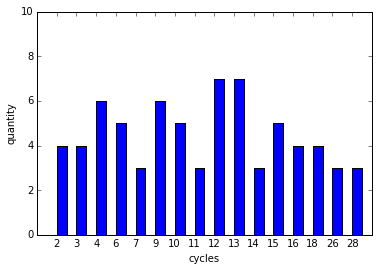

In [42]:
x = range(1,17)
y = df_a['userid'].tolist()
x_ = list(df_a['index'])
plt.xlabel('cycles')  
plt.ylabel('quantity')  
width=0.5
plt.bar(x,y,width=width)
plt.xlim(0,17)
plt.ylim(0,10)
ymajorLocator = MultipleLocator(1)
plt.xticks(x,x_)
plt.show()
#plt.savefig('C:/Users/Yee Shen/Desktop/source/figure/clustering.png',dpi = 300)

In [23]:
y

[3, 7, 8, 7, 7, 7, 7, 6, 6, 6, 6, 5, 6, 5, 4, 3]